In [2]:
# 1. Loading and Preprocessing (1 mark)
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)


X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# Drop the target/species column since clustering is unsupervised
print("Dataset shape after dropping species column:", X.shape)

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dataset shape after dropping species column: (150, 4)


C:\Users\edass\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\edass\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


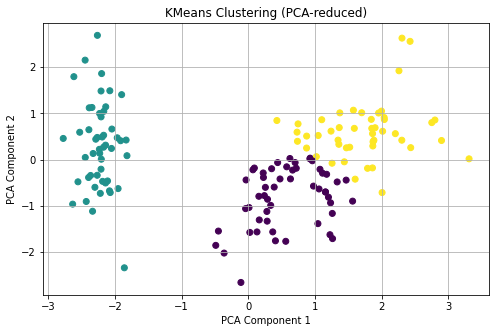

In [5]:
#KMeans Clustering 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
X_kmeans = pd.DataFrame(X_scaled, columns=iris.feature_names)
X_kmeans['Cluster'] = kmeans_labels

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clustering (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()




 KMeans Description:
        
KMeans is a centroid-based algorithm that partitions data into k clusters by minimizing intra-cluster variance.

It iteratively assigns points to the nearest centroid, then recalculates centroids based on cluster members.

Why it's suitable for Iris:

The Iris dataset contains clearly defined clusters (3 species).

KMeans is efficient and works well when clusters are roughly spherical and of similar size, as is the case here.

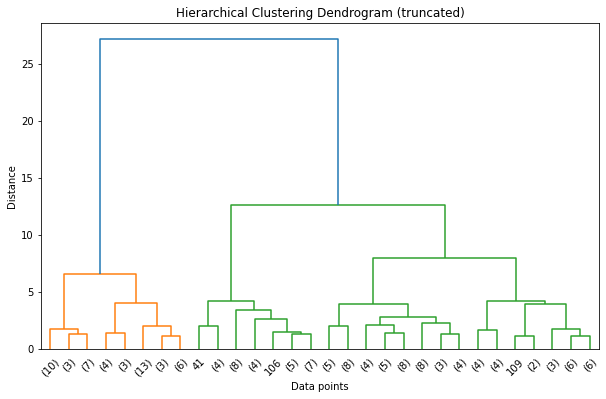

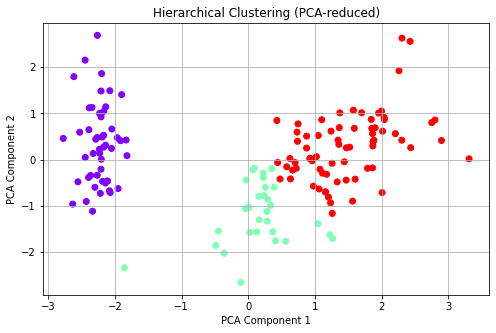

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Hierarchical clustering using Ward’s method
linked = linkage(X_scaled, method='ward')

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

# Assigning cluster labels (3 clusters)
hierarchical_labels = fcluster(linked, 3, criterion='maxclust')

# Visualization using PCA
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='rainbow')
plt.title("Hierarchical Clustering (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


Hierarchical Clustering Description:

Hierarchical clustering creates a tree-like structure (dendrogram) by recursively merging or splitting clusters based on a distance metric.

In agglomerative clustering, each point starts as its own cluster, and pairs are merged based on closeness.

Why it's suitable for Iris:

It gives a visual insight into the structure and relationships between clusters.

Doesn’t require to choose the number of clusters upfront (until cut the dendrogram).